## Homework Scraping



Πάμε να μάθουμε τι είδους UFO κυκλοφορούν αυτό το διάστημα στον πλανήτη μας! Φυσικά δεν θα βγούμε στο μπαλκόνι να τα ψάξουμε, γιατί πολύ 
απλά το έχουν κάνει χιλιάδες άνθρωποι πριν από εμάς και έχουν καταγράψει λεπτομερώς τι είδαν στο εκπληκτικό site: 

**NATIONAL UFO 
REPORTING CENTER** ( http://www.nwlink.com/~ufocntr/ )


Για αρχή εισάγετε τις βιβλιοθήκες που θα χρειαστείτε

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

Πάμε να φέρουμε τα δεδομένα μας με BeautifulSoup από τη λίστα με τις εμφανίσεις των "Άγνωστης Ταυτότητας Ιπτάμενων Αντικειμένων" 
που βρίσκεται εδώ: http://www.nuforc.org/webreports/ndxevent.html

In [2]:
my_url = 'http://www.nuforc.org/webreports/ndxevent.html'

raw_html = urlopen(my_url).read()
ufos_doc = BeautifulSoup(raw_html, "html.parser")

Ρίξτε μια ματιά σ' αυτά που πήρατε τυπώνοντας το αποτέλεσμα της beautifulSoup

In [27]:
#ufos_doc

Φαίνεται μια χαρά, τώρα ανοίξτε την σελίδα αυτή ( http://www.nuforc.org/webreports/ndxevent.html )
στον browser και βρείτε με δεξί κλικ inspect, 

1.) πώς είναι γραμμένα στην html τα links για τις εσωτερικές σελίδες και 

2.) πώς είναι γραμμένα τα νούμερα των αναφορών που έγιναν κάθε μέρα

In [4]:
#κρατήστε σημειώσεις εδώ για να θυμάστε τι ψάχνετε

In [5]:
## 1.Φτιάξτε μια μεταβλητή links όπως φαίνεται παρακάτω συμπληρώνοντας αυτό που λείπει 


In [28]:
links = ufos_doc.find_all('a')

for link in links:
    (link['href'])

## 2. Φτιάξτε άλλη μία που περιέχει τον αριθμό των συμβάντων, συμπληρώστε αυτό που λείπει.

In [29]:
count = ufos_doc.find_all('td', {'align': 'RIGHT'} )
#count

Ελέγξτε ότι πήρατε αυτά που θέλετε τυπώνοντας τις μεταβλητές links & count

## Φτιάξτε μια μεταβλητή urls για κάθε ένα link που βρίσκεται στη λίστα links που ορίσατε παραπάνω

Αυτό που θα μάθετε παρακάτω είναι ο τρόπος με τον οποίο κάνουμε λούπες στα Pandas και λέγεται list comprehension!!!

In [30]:
urls = [line['href'] for line in links]

In [32]:
#urls

Χμ, τα links είναι μια χαρά, εκτός από το πρώτο που δεν το θέλουμε και θα μας χαλάσει το scraping, 
ας πούμε στην λίστα να μην πάρει την πρώτη εγγραφή

In [33]:
urls = [line['href'] for line in links][1:]

In [34]:
#urls

Ας τσεκάρουμε και τη λίστα count

In [35]:
#[print(line) for line in count]

## 3. Φτιάξτε μια λίστα links την οποία θα γεμίσετε με τα ολοκληρωμένα urls που θα έχουν τη μορφή 
"http://www.nuforc.org/webreports/ndxe201903.html,
    http://www.nuforc.org/webreports/ndxe201902.html κ.λπ"

In [37]:
links=[]
for url in urls:
    link = 'http://www.nuforc.org/webreports/'+ url
    links.append(link)

In [38]:
links

['http://www.nuforc.org/webreports/ndxe202104.html',
 'http://www.nuforc.org/webreports/ndxe202103.html',
 'http://www.nuforc.org/webreports/ndxe202102.html',
 'http://www.nuforc.org/webreports/ndxe202101.html',
 'http://www.nuforc.org/webreports/ndxe202012.html',
 'http://www.nuforc.org/webreports/ndxe202011.html',
 'http://www.nuforc.org/webreports/ndxe202010.html',
 'http://www.nuforc.org/webreports/ndxe202009.html',
 'http://www.nuforc.org/webreports/ndxe202008.html',
 'http://www.nuforc.org/webreports/ndxe202007.html',
 'http://www.nuforc.org/webreports/ndxe202006.html',
 'http://www.nuforc.org/webreports/ndxe202005.html',
 'http://www.nuforc.org/webreports/ndxe202004.html',
 'http://www.nuforc.org/webreports/ndxe202003.html',
 'http://www.nuforc.org/webreports/ndxe202002.html',
 'http://www.nuforc.org/webreports/ndxe202001.html',
 'http://www.nuforc.org/webreports/ndxe201912.html',
 'http://www.nuforc.org/webreports/ndxe201911.html',
 'http://www.nuforc.org/webreports/ndxe201910.

## 4.  Τώρα που έχετε μια λίστα με τα links, αρχίστε το scraping των reports κάθε μήνα. Μπορείτε να χρησιμοποιήσετε ή beautiful soup ή selenium ή συνδυασμό των 2.

Δείτε τι περιλαμβάνει κάθε εγγραφή π.χ. εδώ: http://www.nuforc.org/webreports/ndxe201904.html

Πρέπει για κάθε εγγραφή να πάρετε Date, City, State, Shape και Summary.

## Μέσα στον scraper θα δημιουργείτε dictionaries τα οποία στην συνέχεια θα γίνουν οι στήλες του dataframe σας.

In [15]:
sublinks=links[0:16] #tha exetasoume apo to 2018 mexri simera

In [16]:
recordslist=[]

for link in sublinks:

    rawhtml = urlopen(link).read()
    ufosdoc = BeautifulSoup(rawhtml, "html.parser")


    trs = ufosdoc.find_all('tr', {'valign': 'TOP'})

#trs[1].text.split('\n')

    for tr in trs:
        record={}
        attributeslist=tr.text.split('\n')
        record={'Date': attributeslist[1],
                'City': attributeslist[2],
                'State': attributeslist[3],
                'Shape': attributeslist[4],
                'Summary': attributeslist[6]
            }
        recordslist.append(record)
print(recordslist)

[{'Date': '4/23/21 06:30', 'City': 'Blackshear', 'State': 'GA', 'Shape': 'Circle', 'Summary': 'Very strange   ((NUFORC Note:  Rocket launch from Cape Canaveral.  PD))'}, {'Date': '4/23/21 06:00', 'City': 'Mechanicsville', 'State': 'VA', 'Shape': 'Circle', 'Summary': 'Ball in the sky   ((NUFORC Note:  Rocket launch from Cape Canaveral.  PD))'}, {'Date': '4/23/21 06:00', 'City': 'Vero Beach', 'State': 'FL', 'Shape': 'Light', 'Summary': 'I was driving and saw something strange in the sky.   ((NUFORC Note:  Rocket launch from Cape Canaveral.  PD))'}, {'Date': '4/23/21 05:59', 'City': 'St. Augustine', 'State': 'FL', 'Shape': 'Light', 'Summary': '2 extremely bright lights appeared over east coast nearly simultaneously. One appeared to catch fire and fall towards ocean, second app'}, {'Date': '4/23/21 05:58', 'City': 'Durham', 'State': 'NC', 'Shape': 'Cone', 'Summary': 'A cone of light coming from the sky unlike anything I have ever seen.   ((NUFORC Note:  Rocket launch from Cape Canaveral.  

In [17]:
recordslist

[{'Date': '4/23/21 06:30',
  'City': 'Blackshear',
  'State': 'GA',
  'Shape': 'Circle',
  'Summary': 'Very strange   ((NUFORC Note:  Rocket launch from Cape Canaveral.  PD))'},
 {'Date': '4/23/21 06:00',
  'City': 'Mechanicsville',
  'State': 'VA',
  'Shape': 'Circle',
  'Summary': 'Ball in the sky   ((NUFORC Note:  Rocket launch from Cape Canaveral.  PD))'},
 {'Date': '4/23/21 06:00',
  'City': 'Vero Beach',
  'State': 'FL',
  'Shape': 'Light',
  'Summary': 'I was driving and saw something strange in the sky.   ((NUFORC Note:  Rocket launch from Cape Canaveral.  PD))'},
 {'Date': '4/23/21 05:59',
  'City': 'St. Augustine',
  'State': 'FL',
  'Shape': 'Light',
  'Summary': '2 extremely bright lights appeared over east coast nearly simultaneously. One appeared to catch fire and fall towards ocean, second app'},
 {'Date': '4/23/21 05:58',
  'City': 'Durham',
  'State': 'NC',
  'Shape': 'Cone',
  'Summary': 'A cone of light coming from the sky unlike anything I have ever seen.   ((NUFORC

## 5. Μετατρέψτε τη λίστα με τα λεξικά σε ένα dataframe

In [18]:
df = pd.DataFrame(recordslist)

## Ρίξτε μια ματιά στα δεδομένα σας

In [19]:
df.head()

,Date,City,State,Shape,Summary
0,4/23/21 06:30,Blackshear,GA,Circle,Very strange ((NUFORC Note: Rocket launch f...
1,4/23/21 06:00,Mechanicsville,VA,Circle,Ball in the sky ((NUFORC Note: Rocket launc...
2,4/23/21 06:00,Vero Beach,FL,Light,I was driving and saw something strange in the...
3,4/23/21 05:59,St. Augustine,FL,Light,2 extremely bright lights appeared over east c...
4,4/23/21 05:58,Durham,NC,Cone,A cone of light coming from the sky unlike any...


## 6. Φτιάξτε ένα κόκκινο bar chart, σορταρισμένο στο οποίο θα εμφανίζονται τα 5 δημοφιλέστερα σχήματα των UFO

In [20]:
#paratiroume oti sto sxima dataframe exoyme kapoies kenes apantiseis (px sto shape)
#mporoume na petaxoume autes tis martyries pou den anaferoun sxima

<AxesSubplot:>

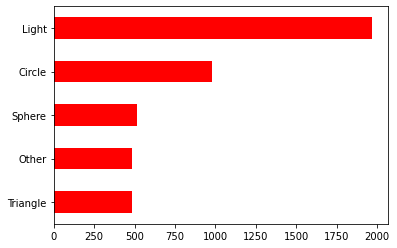

In [21]:
df[df['Shape'] != '']['Shape'].value_counts().sort_values().tail().plot(kind = "barh", color="red")

## 7. Βρείτε σε ποια πολιτεία εμφανίζονται τα περισσότερα UFO.

In [22]:
df['State'].value_counts().head(1)

CA    718
Name: State, dtype: int64

## 8. Μήπως εμφανίζονται άλλα UFO ανάλογα με την περιοχή? Δείτε ποια σχήματα εμφανίζονται συχνότερα σε ποια περιοχή και φτιάξτε ένα γράφημα.

In [23]:
df[(df['State'] != '') & (df['Shape'] != '') ].groupby('State')['Shape'].value_counts()

State  Shape    
AB     Light        11
       Triangle      7
       Other         6
       Circle        5
       Formation     5
                    ..
WY     Oval          1
       Triangle      1
YT     Cigar         2
       Changing      1
       Triangle      1
Name: Shape, Length: 908, dtype: int64

<AxesSubplot:xlabel='State,Shape'>

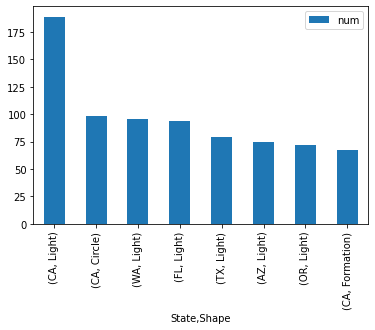

In [24]:
dfnew = pd.DataFrame({"num": df[(df['State'] != '') & (df['Shape'] != '') ].groupby('State')['Shape'].value_counts()} )
dfnew.reset_index()
dfnew.sort_values(by='num', ascending=False).head(8).plot(kind='bar')

#sto diagramma parousiazontai oi pio suxnes emfaniseis UFO ana (perioxi, sxima)

## 9. Φτιάξτε ακόμη 2 γραφήματα της επιλογής σας που να έχουν νόημα!

<AxesSubplot:>

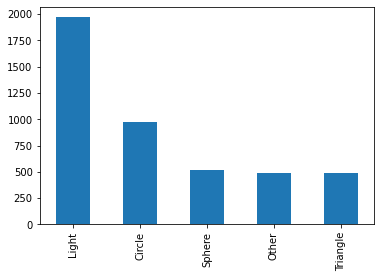

In [25]:
#pio sxima exoun pio suxna ta UFO?
df[df['Shape'] != '']['Shape'].value_counts().sort_values(ascending=False).head().plot(kind = "bar")

<AxesSubplot:>

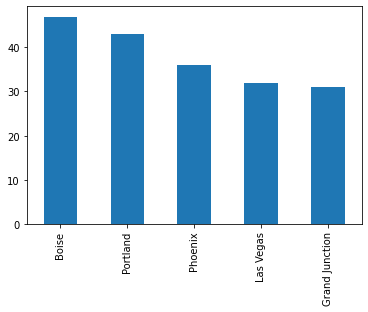

In [26]:
#se poia polu vlepoun pio suxna ta UFO?
df[df['City'] != '']['City'].value_counts().sort_values(ascending=False).head().plot(kind = "bar")

## 10. Σώστε τα δεδομένα σε ένα καινούριο csv.

In [406]:
df.to_csv("ufo.csv", index=False)